In [2]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


[-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
12.246199999999995


NameError: name 'anp' is not defined

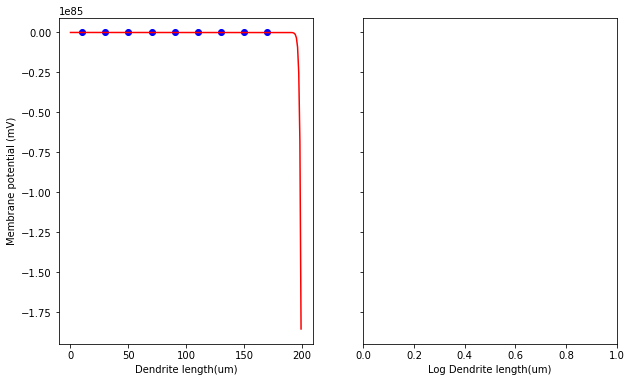

In [8]:
v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]


global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_max_arr[0]-v_max_arr[8]
print(v_diff)
v_lambda = v_max_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_max_arr)
#y_data = [y_data[i]*-1 for i in range(len(y_data))]
#log_y_data = np.log(y_data)
#print(log_y_data)
#log_y_data=np.log(y_data)
[a,b] = np.polyfit(x_data, y_data, 1)
x_best_fit_arr = [i for i in range(200)]
y_best_fit_arr =  [a*np.e**x_best_fit_arr[-m*i] +b for i in range(200)]


f_lenconstant, [ax_1] = mplt.subplots(1,figsize=(10,6), sharex=False,sharey=True) 

ax_1.plot(len_arr,v_max_arr,"bo",)
ax_1.set_ylabel("Membrane potential (mV)")
ax_1.set_xlabel("Dendrite length(um)")

#ax_2.plot(log_x_data, y_data,'bo')
ax_1.plot(x_best_fit_arr, y_best_fit_arr,'r')
ax_2.set_xlabel("Log Dendrite length(um)")

x = symbols('x')
eq1 = Eq( anp.exp**(-x) +b,v_lambda)
sol = solve(eq1)
print(sol)
log_x_lambda = float(sol[0])
x_lambda = np.exp(log_x_lambda)

ax_1.plot(x_lambda, v_lambda,'go')
ax_2.plot(log_x_lambda, v_lambda,'go')

print('--------')
print('Line of Best fit: y = '+str(round(a,3))+'(logx)^2 ' + str(round(b,3))+'(logx) '+str(round(c,3)))
print('--------')
print("Vmax: " + str(round(v_max,2)) +"mV")
print("V-lambda: " + str(round(v_lambda,2)) +"mV")
print("---------")
print("Length constant: " + str(round(x_lambda,4)) + 'um')

In [9]:


def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

[-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
12.246199999999995
R² = 0.9934293409020556
Y = 16.732095403486298 * e^(-0.024173893838661344 * x) + -65.59744623129289
48.57213069662617


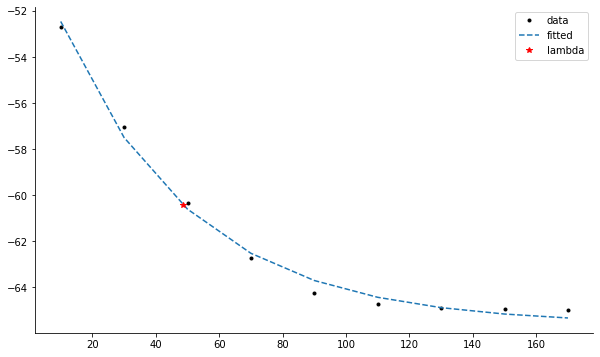

In [49]:
# perform the fit

v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]


global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_max_arr[0]-v_max_arr[8]
print(v_diff)
v_lambda = v_max_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_max_arr)

p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, len_arr, v_max_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(y_data - monoExp(x_data, m, t, b))
squaredDiffsFromMean = np.square(y_data - np.mean(y_data))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results


f_lenconstant, ax_1 = mplt.subplots(1,figsize=(10,6), sharex=False,sharey=True) 

y_curve_arr = [monoExp(len_arr[i], m, t, b) for i in range(len(len_arr))]


ax_1.plot(len_arr, v_max_arr, '.', label="data", color='black')
ax_1.plot(len_arr, y_curve_arr, '--', label="fitted")
#ax_1.title("Fitted Exponential Curve")



# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
#print(f"Tau = {tauSec * 1e6} µs")



############## FIND LAMBDA


y_lambda = v_lambda
x_lambda = np.log((y_lambda-b)/m)/-t
print(x_lambda)

ax_1.plot(x_lambda,y_lambda,'*',color='red',label='lambda')

ax_1.legend()
sns.despine()